# Introduction

The purpose is to compare the average global temperature with those of my city.

In [38]:
import pandas as pd

ny_df = pd.read_csv("new_york.csv")
global_df = pd.read_csv("global.csv")

The data was extracted from the global_data table and the city_data tables usng the following SQL queries. I chose to analyze the data using Python and Pandas since I am more comfortable with that than excel.

SELECT year, avg_temp FROM global_data;

SELECT year, avg_temp FROM city_data
WHERE UPPER(city) LIKE UPPER('new york');

In [39]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
year        271 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


Looks like there is some missing temps in the NY data. That needs to be cleaned up.

In [42]:
ny_df = ny_df.dropna()

In [43]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 270
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


Now we have eliminated entries without temperatures in the NY dataframe.

In [44]:
ny_df.head()

,year,avg_temp
0,1743,3.26
1,1744,11.66
2,1745,1.13
7,1750,10.07
8,1751,10.79


In [25]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [45]:
global_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


The data in the NY dataframe looks a bit erratic, so we will add a moving average to smooth it out. We'll do that for the global data as well just to have a fair comparison. After trying the 4, 7, and 10 year moving averages, it looks like the 10 year gives the clearest picture.

In [81]:
ny_df['moving_average'] = ny_df['avg_temp'].rolling(10).mean()

In [82]:
ny_df.head(20)

,year,avg_temp,moving_average
0,1743,3.26,NaN
1,1744,11.66,NaN
2,1745,1.13,NaN
7,1750,10.07,NaN
8,1751,10.79,NaN
9,1752,2.81,NaN
10,1753,9.52,NaN
11,1754,9.88,NaN
12,1755,6.61,NaN
13,1756,9.94,7.567


In [83]:
global_df['moving_average'] = global_df['avg_temp'].rolling(10).mean()

In [84]:
global_df.head(20)

,year,avg_temp,moving_average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


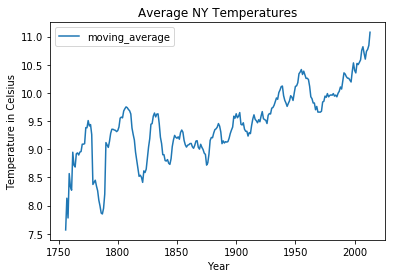

In [85]:
ny_plot = ny_df.plot(x='year', y='moving_average')
ny_plot.set_title("Average NY Temperatures")
ny_plot.set_xlabel("Year")
ny_plot.set_ylabel("Temperature in Celsius")
ny_plot;

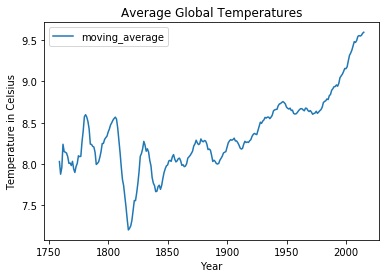

In [86]:
global_plot = global_df.plot(x='year', y='moving_average')
global_plot.set_title("Average Global Temperatures")
global_plot.set_xlabel("Year")
global_plot.set_ylabel("Temperature in Celsius")
global_plot;

# Observations

- The two graphs basically follow the same upward trend. Their patterns echo each other.                                                                                                                      
- Looking closer at the graphs though, the moving averages for NY do seem to be more erratic than those in the global data.
- One of the differences is that there is a large dip in global temperatures somewhere around 1810. That dip happens in NY in about 1790.
- There is a big spike and then dip in temp around 1950 that is not as pronounced in the global data.